In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#Target:

#Churn — Cliente deu churn ou não

#Variáveis numéricas:

#Tenure — Número de meses que o cliente está na base
#MonthlyCharges — A quantia consumida por cliente mensalmente
#TotalCharges — A quantia consumida por cliente total

#Variáveis categóricas:

#CustomerID - Id do cliente
#Gender — M/F
#SeniorCitizen — Se o cidadão é ou não idoso (0,1)
#Partner — Se o cliente é ou não casado
#Dependents — Cliente tem dependentes (Yes, No)
#PhoneService — Cliente tem serviço telefonico (Yes, No)
#MulitpleLines — Se o cliente tem várias linhas ou não (Yes, No, No Phone Service)
#InternetService — Tipo do serviço de internet (DSL, Fiber Optic, None)
#OnlineSecurity — Se o cliente tem segurança online (Yes, No, No Internet Service)
#OnlineBackup — WSe o cliente tem Backup Online (Yes, No, No Internet Service)
#DeviceProtection — Se o cliente tem proteção do dispositivo (Yes, No, No Internet Service)
#TechSupport — Se o cliente tem suporte tecnológico (Yes, No, No Internet Service)
#StreamingTV — Se o cliente tem streaming de TV (Yes, No, No Internet Service)
#StreamingMovies — Se o cliente tem serviço de streaming de filmes (Yes, No, No Internet Service)
#Contract — Termo de contrato do cliente (Monthly, 1-Year, 2-Year)
#PaperlessBilling — Se o cliente tem ou não boleto sem papel (Yes, No)
#PaymentMethod — Método de pagamento do cliente(E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [248]:
churn = pd.read_excel("churn_data.xlsx")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Understanding

In [39]:

churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [40]:
churn.isna().count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [41]:
churn_agg = churn.groupby("Churn")['customerID'].count().reset_index()
churn_agg = pd.DataFrame(churn_agg)
churn_agg

,Churn,customerID
0,No,5174
1,Yes,1869


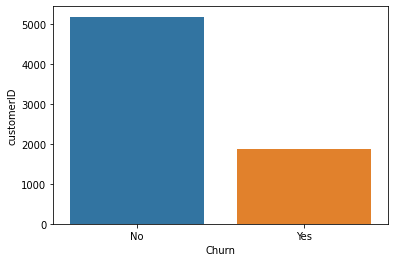

In [42]:
sns.barplot(data=churn_agg, x = "Churn",y = "customerID")

In [43]:
churn_agg = churn.groupby("PaymentMethod")['customerID'].count().reset_index()
churn_agg = pd.DataFrame(churn_agg)
churn_agg

,PaymentMethod,customerID
0,Bank transfer (automatic),1544
1,Credit card (automatic),1522
2,Electronic check,2365
3,Mailed check,1612


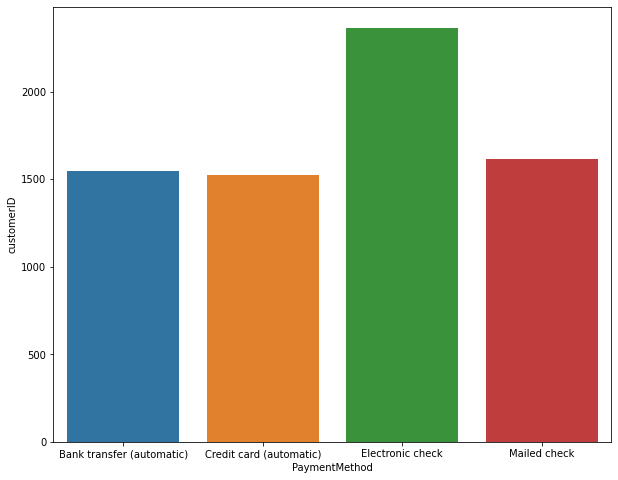

In [44]:
plt.figure(figsize=[10,8])
sns.barplot(data=churn_agg, x = "PaymentMethod",y = "customerID");

In [45]:
churn_agg_gender = churn.groupby("gender")['customerID'].count().reset_index()
churn_agg_gender = pd.DataFrame(churn_agg_gender)
churn_agg_gender

,gender,customerID
0,Female,3488
1,Male,3555


In [46]:
churn_agg_pgt = churn.groupby(["Churn","PaymentMethod"])['customerID'].count().reset_index()
churn_agg_pgt.head()

,Churn,PaymentMethod,customerID
0,No,Bank transfer (automatic),1286
1,No,Credit card (automatic),1290
2,No,Electronic check,1294
3,No,Mailed check,1304
4,Yes,Bank transfer (automatic),258


In [47]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [170]:
churn.dropna(inplace=True)

In [177]:
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"],errors='coerce')

In [172]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [178]:
X = churn.drop(columns=["customerID","Churn"], axis=1)

y = churn[["Churn"]]

In [179]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churn) 
y.Churn = le.transform(y.Churn)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [180]:
X = pd.get_dummies(X)

In [181]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Regressão Logística

In [183]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [184]:
lr.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1])

In [185]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
6984,0.0,0.788732,0.709453,0.576223,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
4065,1.0,0.112676,0.609950,0.080747,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
5523,0.0,0.422535,0.026368,0.077377,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
6348,0.0,0.901408,0.711443,0.663605,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
5233,0.0,0.267606,0.700995,0.201090,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.0,0.492958,0.761692,0.409283,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
1031,0.0,0.985915,0.632836,0.681468,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
3439,0.0,0.633803,0.844776,0.528023,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
6738,1.0,0.000000,0.664179,0.007639,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


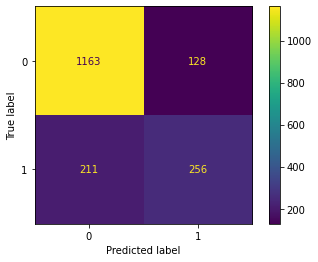

In [186]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test, values_format='d');

In [187]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8058399696624953
Acurácia (Teste): 0.8071672354948806
Acurácia Balanceada (Treino): 0.7228503628228858
Acurácia Balanceada (Teste): 0.7245159620963448
Precision (Treino): 0.6640625
Precision (Teste): 0.6666666666666666
Recall (Treino): 0.5456490727532097
Recall (Teste): 0.5481798715203426
F1-Score (Treino): 0.5990602975724354
F1-Score (Teste): 0.6016451233842538
ROCAUC (Treino): 0.847661085550748
ROCAUC (Teste): 0.8432874935519666


# Random Forest

In [194]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()

In [195]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [196]:
rf.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0])

In [197]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
6984,0.0,0.788732,0.709453,0.576223,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
4065,1.0,0.112676,0.609950,0.080747,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
5523,0.0,0.422535,0.026368,0.077377,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
6348,0.0,0.901408,0.711443,0.663605,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
5233,0.0,0.267606,0.700995,0.201090,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.0,0.492958,0.761692,0.409283,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
1031,0.0,0.985915,0.632836,0.681468,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
3439,0.0,0.633803,0.844776,0.528023,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
6738,1.0,0.000000,0.664179,0.007639,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


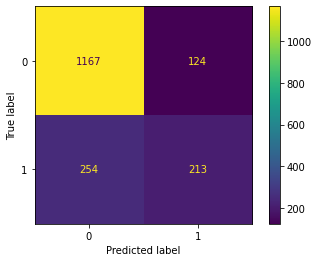

In [198]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test, y_test, values_format='d');

In [199]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9977246871444824
Acurácia (Teste): 0.7849829351535836
Acurácia Balanceada (Treino): 0.997312907475743
Acurácia Balanceada (Teste): 0.6800266048761231
Precision (Treino): 0.9950142450142451
Precision (Teste): 0.6320474777448071
Recall (Treino): 0.9964336661911555
Recall (Teste): 0.45610278372591007
F1-Score (Treino): 0.9957234497505346
F1-Score (Teste): 0.5298507462686567
ROCAUC (Treino): 0.9999776183079662
ROCAUC (Teste): 0.8180750609142191


In [200]:
# Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [201]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [202]:
dict = grid_search.best_estimator_.get_params()

In [203]:
from sklearn.ensemble import RandomForestClassifier

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 10, max_features= 'auto',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 500, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=10, n_estimators=500)

In [204]:
rf_tunned.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=10, n_estimators=500)

In [205]:
rf_tunned.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1])

In [206]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
6984,0.0,0.788732,0.709453,0.576223,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
4065,1.0,0.112676,0.609950,0.080747,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
5523,0.0,0.422535,0.026368,0.077377,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
6348,0.0,0.901408,0.711443,0.663605,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0
5233,0.0,0.267606,0.700995,0.201090,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.0,0.492958,0.761692,0.409283,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
1031,0.0,0.985915,0.632836,0.681468,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
3439,0.0,0.633803,0.844776,0.528023,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
6738,1.0,0.000000,0.664179,0.007639,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1


In [207]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8780811528251802
Acurácia (Teste): 0.7957906712172924
Acurácia Balanceada (Treino): 0.820052485528348
Acurácia Balanceada (Teste): 0.7010525844381379
Precision (Treino): 0.818105616093881
Precision (Teste): 0.6508379888268156
Recall (Treino): 0.6961483594864479
Recall (Teste): 0.4989293361884368
F1-Score (Treino): 0.7522157996146436
F1-Score (Teste): 0.5648484848484849
ROCAUC (Treino): 0.955623828415133
ROCAUC (Teste): 0.8416022969097541
